**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Profesora: Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Eduardo Selim Martínez Mayorga
*   MATRÍCULA: A01795167


En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [1]:
# Se importa la librería pandas con el alias pd
import pandas as pd

In [2]:
# Leemos el archivo csv, asignando el nombre solicitado
air_df = pd.read_csv("LaqnData.csv")
# IMPORTANTE: El archivo csv se encuentra en la misma
# carpeta que este Jupyter Notebook en mi equipo local

# Ó si se lee desde la carpeta de GitHub
# url="https://raw.githubusercontent.com/EduMtzITESM/CienciaAnaliticaDatos10/main/Actividad2AnalisisDatosPandas/LaqnData.csv"
# air_df = pd.read_csv(url)

# Se verifica la asiganción imprimiendo los primeros renglones
air_df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


In [3]:
# Se verifica el número de renglones y columnas del dataframe
air_df.shape

(43800, 6)

Esto significa que este dataframe tiene **43,800 filas** y **6 columnas**

In [4]:
# Con la función `columns` vemos el nombre de las columnas
# que tiene el dataframe
air_df.columns

Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')

In [5]:
# Se imprimen los primeros renglones del dataframe
air_df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


In [6]:
# Se imprimen los últimos renglones del dataframe
air_df.tail()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


In [7]:
# Se revisa el tipo de datos de cada columna
air_df.dtypes

Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object

Se puede ver que las columnas `Site`, `Species`, `ReadingDateTime`, `Units`y `Provisional or Ratified` tienen valores de tipo *STRING*. Los valores de columna `Value` son de tipo *FLOTANTE* (número reales con punto decimal)

2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:

Respuesta: 

La pregunta es ligeramente ambigua. Analicemos un poco el dataframe. Primero veamos cuántos valores nulos ó faltantes tiene cada columna

In [8]:
air_df.isna().sum()

Site                          0
Species                       0
ReadingDateTime               0
Value                      3230
Units                         0
Provisional or Ratified       0
dtype: int64

Se puede ver que sólo la columna `Value` tiene falores nulos ó faltantes

Ahora veamos los valores únicos en cada columna:

In [9]:
air_df.nunique()

Site                          1
Species                       5
ReadingDateTime            8760
Value                      1847
Units                         3
Provisional or Ratified       1
dtype: int64

Notemos que las columnas `Site` y `Provisional or Ratified` sólo toman un valor. Entonces no aportan información diferenciadora a cada renglón.

Nótese que hay 5 categorías en la variable `Species` y 8760 en `ReadingDateTime` y nótese que $5 \cdot 8760 = 43800$, que es el número de renglones del dataframe.

Veamos qué pasa con la columna `Units`

In [10]:
air_df['Units'].unique()

array(['ug m-3', 'ug m-3 as NO2', 'ug/m3'], dtype=object)

Obsérvese que en realidad es la misma unidad, codificada de 3 maneras diferentes. Es decir, la variable `Units` no aporta información diferenciadora a cada renglón. Entonces, podemos afirmar que la información relevante está dada por los vectores de tres entradas (`Species`,`ReadingDateTime`,`Value`)

*   ¿Cuántas mediciones se hicieron?

Se interpretará la pregunta como ¿Cuántas mediciones **no nulas** se hicieron?

Se han establecido los siguientes hechos:

- La información relevante está dada por los vectores de tres entradas (`Species`, `ReadingDateTime`, `Value`)
- Hay 5 categorías en la variable `Species` y 8760 en `ReadingDateTime` y como $5 \cdot 8760 = 43800$, significa que por cada categoría de la variable `Species` hay 8760 valores diferentes de `ReadingDateTime`
- Hay 1847 valores nulos en la columna `Value`

Esto significa que hay 43800 - 1847 = 41953 triadas (`Species`, `ReadingDateTime`, `Value`) diferentes **no nulas**

*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?

Se registraron 5 contaminantes, a saber:

In [11]:
air_df['Species'].unique()

array(['NO', 'NO2', 'NOX', 'PM10', 'PM2.5'], dtype=object)

*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.

Nótese que

In [12]:
air_df.nunique()

Site                          1
Species                       5
ReadingDateTime            8760
Value                      1847
Units                         3
Provisional or Ratified       1
dtype: int64

Las columnas `Site` y `Provisional or Ratified` sólo toman un valor, por tanto no aportan información diferenciadora a cada renglón. Entonces, se eliminarán estas dos columnas del dataframe

In [13]:
air_df = air_df.drop(columns =['Site', 'Provisional or Ratified'])

In [14]:
# Se verifica que efectivamente se eliminaron las columnas
air_df.head()

,Species,ReadingDateTime,Value,Units
0,NO,01/01/2017 00:00,3.5,ug m-3
1,NO,01/01/2017 01:00,3.6,ug m-3
2,NO,01/01/2017 02:00,2.2,ug m-3
3,NO,01/01/2017 03:00,2.1,ug m-3
4,NO,01/01/2017 04:00,3.3,ug m-3


* La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

Nótese que

In [15]:
air_df['Units'].unique()

array(['ug m-3', 'ug m-3 as NO2', 'ug/m3'], dtype=object)

Es decir que en realidad es la misma unidad, codificada de 3 maneras diferentes. Por tanto, la variable `Units` no aporta información diferenciadora a cada renglón. Entonces, se eliminará esta columna del dataframe

In [16]:
air_df = air_df.drop(columns =['Units'])

In [17]:
# Se verifica que efectivamente se eliminaron las columnas
air_df.head()

,Species,ReadingDateTime,Value
0,NO,01/01/2017 00:00,3.5
1,NO,01/01/2017 01:00,3.6
2,NO,01/01/2017 02:00,2.2
3,NO,01/01/2017 03:00,2.1
4,NO,01/01/2017 04:00,3.3


¡Listo! Ya sólo se tienen las columnas (triadas) que aportan información

3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

Nótese que

In [18]:
air_df['Species'].value_counts()

PM2.5    8760
NO2      8760
NOX      8760
PM10     8760
NO       8760
Name: Species, dtype: int64

Como se dijo antes, hay 5 categorías en la variable `Species` y 8760 en `ReadingDateTime` y como  $5⋅8760=43800$, significa que por cada categoría de la variable `Species` hay 8760 valores diferentes de `ReadingDateTime`; hecho que se verifica con el output de la función `value_counts()`

4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

Como ya se dijo que los diferentes contaminantes están en la variable `Species` y la variable `Value` es efectivamente la medición, se agrupará por `Species` y se obtendrá la media de la variable `Value` en cada grupo

In [19]:
air_df.groupby(['Species'])['Value'].mean()

Species
NO       15.045115
NO2      38.010185
NOX      61.078661
PM10     22.551704
PM2.5    14.999831
Name: Value, dtype: float64

5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

Nótese que

In [20]:
air_df['ReadingDateTime'].nunique()

8760

In [21]:
air_df['ReadingDateTime'].unique()

array(['01/01/2017 00:00', '01/01/2017 01:00', '01/01/2017 02:00', ...,
       '31/12/2017 21:00', '31/12/2017 22:00', '31/12/2017 23:00'],
      dtype=object)

y ya también se dijo que por cada categoría de la variable `Species` hay 8760 valores diferentes de `ReadingDateTime`. Esto significa que se puede recodificar la información contenida en la variable `ReadingDateTime` (que es lo que se pregunta efectivamente)

In [22]:
# Aplicaremos la funcion `pivot` para volver el dataframe de largo
# a ancho
pvt_df = air_df.pivot(index = 'ReadingDateTime',
                      columns = 'Species',
                      values = 'Value')

In [23]:
# Se verifica el resultado
pvt_df.head()

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN


6.	A través de la función `describe()` responde:

In [24]:
resumen = pvt_df.describe()
resumen

Species,NO,NO2,NOX,PM10,PM2.5
count,8660.000000,8660.000000,8660.000000,8657.000000,5933.000000
mean,15.045115,38.010185,61.078661,22.551704,14.999831
std,26.678565,18.580841,54.584805,15.344755,13.558588
min,-2.000000,2.800000,1.000000,-5.600000,-8.000000
25%,3.100000,23.800000,30.300000,13.900000,7.000000
50%,7.100000,35.300000,46.900000,19.500000,11.000000
75%,15.500000,49.900000,73.800000,27.300000,18.000000
max,401.799990,120.200000,734.299990,633.099980,128.000000


*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?

In [25]:
# El valor máximo es:
resumen['NO2']['max']

120.2

In [26]:
# Para encontrar el día donde ocurre el evento
condicion = (pvt_df['NO2'] == resumen['NO2']['max'])

In [27]:
pvt_df[condicion]

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
24/01/2017 19:00,148.60001,120.2,348.10001,44.4,42.0


Es decir, que la fecha en la que ocurrió el mayor valor de `NO2` es 24/01/2017

* ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?

In [28]:
# El valor mínimo es:
resumen['PM10']['min']

-5.6

In [29]:
# Para encontrar el día donde ocurre el evento
condicion = (pvt_df['PM10'] == resumen['PM10']['min'])

In [30]:
pvt_df[condicion]

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
12/09/2017 23:00,0.1,7.0,7.1,-5.6,NaN


Es decir, que la fecha en la que ocurrió el menor valor de `PM10` es 12/09/2017

* ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?

In [31]:
# El valor de la mediana es:
resumen['NO']['50%']

7.1

Esto significa que el 50\% de las mediciones del `NO` está por debajo de 7.1

* ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [32]:
# El valor del primer cuartil es:
resumen['PM2.5']['25%']

7.0

Esto significa que el 25% de las mediciones del `PM2.5` está por debajo de 7.0

7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

In [33]:
pvt_df.columns

Index(['NO', 'NO2', 'NOX', 'PM10', 'PM2.5'], dtype='object', name='Species')

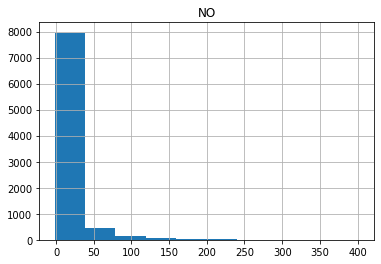

In [34]:
# Para la columna `NO`
pvt_df.hist(column = 'NO');

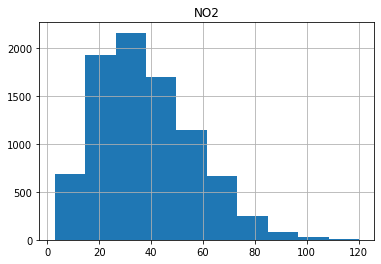

In [35]:
# Para la columna `NO2`
pvt_df.hist(column = 'NO2');

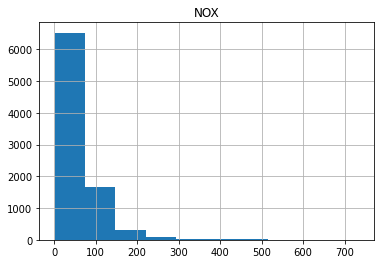

In [36]:
# Para la columna `NOX`
pvt_df.hist(column = 'NOX');

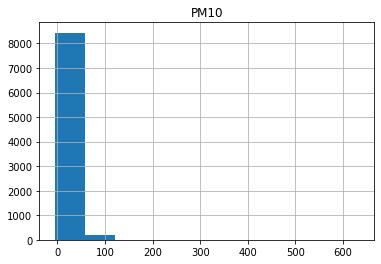

In [37]:
# Para la columna `PM10`
pvt_df.hist(column = 'PM10');

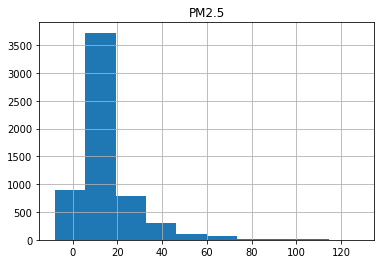

In [38]:
# Para la columna `PM2.5`
pvt_df.hist(column = 'PM2.5');

Dado que las variables en las distintas columnas están en diferentes escalas, se usará la desviación estándar para decidir cuál es el contaminante tiene mayor variabilidad, no a partir de sus histogramas (que supongo que era la intención de la pregunta). A saber,

In [39]:
resumen = pvt_df.describe()
resumen.loc[['std']]

Species,NO,NO2,NOX,PM10,PM2.5
std,26.678565,18.580841,54.584805,15.344755,13.558588


Entonces, se puede ver que el contaminante `NOX` es la que tiene mayor variabilidad, pues tiene la mayor desviación estándar.

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [40]:
"""
Crea un dataframe a partir de la columna `ReadingDateTime` del
dataframe air_df en el que una columna es la fecha y la otra
es la hora. La función str.split(' ',expand=True) busca un
espacio vacío y lo separa en dos columnas; justo los valores de
la columna `ReadingDateTime` son strings donde un espacio
separa la fecha de la hora
"""
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)

"""
Le asigna como nombres 'Date' y 'Time' a las columnas del dataframe
recién creado
"""
datetime_df.columns = ['Date','Time']

# Imprime simplemente el dataframe `datetime_df`
datetime_df

"""
Crea un dataframe a partir de la columna `Date` del
dataframe datetime_df en el que una columna es el día, otra el mes
y la otra es el año. 
La función str.split('/',expand=True) busca un
caracter "/" y lo separa en las columnas que sea necesario.
Justo los valores de la columna `Date` son strings donde una diagonal
separa el día, del mes, del año.
"""
date_df = datetime_df.Date.str.split('/',expand=True)

"""
Le asigna como nombres 'Day','Month' y 'Year' a las columnas 
del dataframe recién creado
"""
date_df.columns = ['Day','Month','Year']

# Imprime simplemente el dataframe `datetime_df`
date_df

# Hace join o une los 3 dataframes: air_dafe, date_df y
# datetime_df. Además, elimina las columnas 'ReadingDateTime' 
# y 'Year'
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])

# Asigna como índice del dataframe a 
# como ['Month','Day','Time','Species']
air_df = air_df.set_index(['Month','Day','Time','Species'])

# Imprime simplemente el dataframe `air_df`
air_df

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

9. Ejecuta la siguiente instrucción y compara la salida del código anterior con `pvt_df` del ejercicio 8. ¿Son iguales?

In [41]:
# código proporcionado
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

Asignemos este dataframe a una variable para analizarlo. A saber,

In [42]:
air_df_UNSTACK = air_df.unstack()

In [43]:
# Obtengamos  el índice de pvt_df
pvt_df.index

Index(['01/01/2017 00:00', '01/01/2017 01:00', '01/01/2017 02:00',
       '01/01/2017 03:00', '01/01/2017 04:00', '01/01/2017 05:00',
       '01/01/2017 06:00', '01/01/2017 07:00', '01/01/2017 08:00',
       '01/01/2017 09:00',
       ...
       '31/12/2017 14:00', '31/12/2017 15:00', '31/12/2017 16:00',
       '31/12/2017 17:00', '31/12/2017 18:00', '31/12/2017 19:00',
       '31/12/2017 20:00', '31/12/2017 21:00', '31/12/2017 22:00',
       '31/12/2017 23:00'],
      dtype='object', name='ReadingDateTime', length=8760)

In [44]:
# Obtengamos ahora el índice de air_df_UNSTACK
air_df_UNSTACK.index

MultiIndex([('01', '01', '00:00'),
            ('01', '01', '01:00'),
            ('01', '01', '02:00'),
            ('01', '01', '03:00'),
            ('01', '01', '04:00'),
            ('01', '01', '05:00'),
            ('01', '01', '06:00'),
            ('01', '01', '07:00'),
            ('01', '01', '08:00'),
            ('01', '01', '09:00'),
            ...
            ('12', '31', '14:00'),
            ('12', '31', '15:00'),
            ('12', '31', '16:00'),
            ('12', '31', '17:00'),
            ('12', '31', '18:00'),
            ('12', '31', '19:00'),
            ('12', '31', '20:00'),
            ('12', '31', '21:00'),
            ('12', '31', '22:00'),
            ('12', '31', '23:00')],
           names=['Month', 'Day', 'Time'], length=8760)

Se puede notar `pvt_df` es un dataframe de un índice y `air_df_UNSTACK` es un dataframe multi-índice. Por tanto, los dos dataframe son diferentes como objetos. En `pvt_df` el índice es hora y fecha juntos y en `air_df_UNSTACK` los índices son, día, mes, hora y fecha por separado

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

Según la documentación de pandas (https://pandas.pydata.org/docs/index.html):

+ `pivot()`: Return reshaped DataFrame organized by given index / column values. Reshape data (produce a "pivot" table) based on column values. Uses unique values from specified index / columns to form axes of the resulting DataFrame. This function does not support data aggregation, multiple values will result in a MultiIndex in the columns.

+ `melt()`: Unpivot a DataFrame from wide to long format, optionally leaving identifiers set. This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (*id_var*), while all other columns, considered measured variables (*value_vars*), are "unpivoted" to the row axis, leaving just two non-identifier columns, 'variable' and 'value'.

+ `stack()`: Stack the prescribed level(s) from columns to index. Return a reshaped DataFrame or Series having a multi-level index with one or more new inner-most levels compared to the current DataFrame. The new inner-most levels are created by pivoting the columns of the current dataframReturn a reshaped DataFrame or Series having a multi-level index with one or more new inner-most levels compared to the current DataFrame. The new inner-most levels are created by pivoting the columns of the current dataframe

+ `unstack()`: Pivot a level of the (necessarily hierarchical) index labels. Returns a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels.

Es decir, `pivot()` es a `unstack()`; y `melt()` es a `stack()`. Las diferencias significativas es la especificación de los índices (melt/pivot) ó tomarlos que sean necesarios (stack/unstack). Las similutides es que `pivot()`y `unstack()` pasan un dataframe largo (de abajo hacia arriba) a ancho (de izquierda a derecha); y `melt()` y `stack()` pasan un dataframe de ancho (de izquierda a derecha) a largo (de abajo hacia arriba). Visualmente se pueden conseguir las mismos resultados pero los índices no serán los mismo (y luego entonces los objeb)